In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file_datos ="datos_corregidos.csv"
datos = pd.read_csv(file_datos)
datos

,height,utm_x,utm_y,distance,slope,sum_distance,velocidad,timestamp,ds,latitud,longitud
0,2642.442559,719792.366784,9.679521e+06,0.218640,0.640202,0.218640,0.508793,1.494548e+09,0.429723,86.550972,-45.922482
1,2642.295779,719792.438373,9.679521e+06,0.086005,-1.706651,0.304645,-0.173937,1.494548e+09,-0.494459,86.550972,-45.922468
2,2642.447922,719792.463213,9.679521e+06,0.135105,1.126103,0.439750,0.003018,1.494548e+09,44.760967,86.550971,-45.922477
3,2633.041504,719789.596813,9.679536e+06,15.330054,-0.613593,15.769804,15.330054,1.494548e+09,1.000000,86.551099,-45.921462
4,2633.031250,719789.596813,9.679536e+06,0.100000,-0.102540,15.869804,0.100000,1.494548e+09,1.000000,86.551099,-45.921462
...,...,...,...,...,...,...,...,...,...,...,...
12828,2057.183350,699618.485084,9.559176e+06,0.494997,0.576079,206882.313866,0.494997,1.494561e+09,1.000000,85.685061,-56.488862
12829,2057.157227,699619.263484,9.559176e+06,0.894477,-0.029205,206883.208344,0.894477,1.494561e+09,1.000000,85.685062,-56.488755
12830,2057.173828,699619.374546,9.559176e+06,0.111062,0.149475,206883.319406,0.111062,1.494561e+09,1.000000,85.685061,-56.488743
12831,2057.191895,699619.485367,9.559176e+06,0.156732,0.115273,206883.476138,0.156732,1.494561e+09,1.000000,85.685060,-56.488737


In [4]:
datos["next_vel"] = datos["velocidad"].shift(-1)

datos['aceleracion'] = datos["velocidad"] - datos["next_vel"]

In [29]:
datos

,height,SPEED,utm_x,utm_y,distance,slope,sum_distance,velocidad,next_vel,aceleracion
0,2646.850098,0.979155,8.671938e+07,1.892181e+07,215.500803,-0.010411,2.155008e+02,215.500803,144.444666,7.105614e+01
1,2644.606445,0.532513,8.671953e+07,1.892165e+07,144.444666,0.011304,3.599455e+02,144.444666,11.373631,1.330710e+02
2,2646.239253,NaN,8.671944e+07,1.892177e+07,11.373631,-0.014228,3.713191e+02,11.373631,11.373631,4.823802e-09
3,2646.077424,NaN,8.671944e+07,1.892176e+07,11.373631,-0.014228,3.826927e+02,11.373631,11.373631,0.000000e+00
4,2645.915596,NaN,8.671945e+07,1.892174e+07,11.373631,-0.014228,3.940664e+02,11.373631,11.373631,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
30570,2057.364502,0.883016,8.627987e+07,2.600186e+07,12.776192,0.000153,9.267043e+06,12.776192,13.511319,-7.351271e-01
30571,2057.366455,0.808202,8.627987e+07,2.600185e+07,13.511319,0.000181,9.267057e+06,13.511319,6.155153,7.356166e+00
30572,2057.368896,0.615988,8.627987e+07,2.600184e+07,6.155153,0.000397,9.267063e+06,6.155153,6.155153,-4.049216e-07
30573,2057.371338,0.587766,8.627987e+07,2.600183e+07,6.155153,0.000238,9.267069e+06,6.155153,NaN,NaN


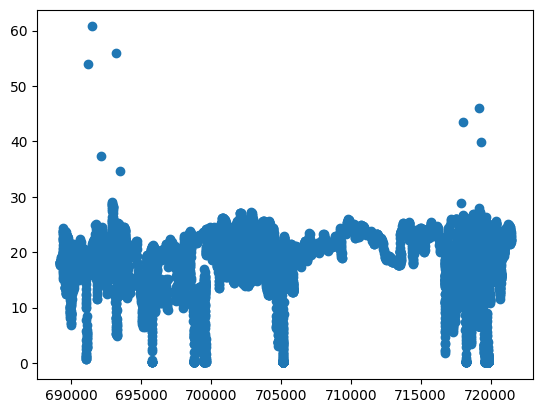

In [5]:
plt.scatter(datos['utm_x'], datos['distance'])

In [6]:
def est_energia(data, densidad_aire = 0.893, fr=0.008, rd=0.191, area_front=3.419, masa=3185, g=9.8, cd=0.5):
    
    frr = fr * masa * g * np.cos(datos['slope'])
    fg = masa * g *np.sin(datos['slope'])
    fa = masa * datos['velocidad'] / datos['aceleracion']
    fd = (0.5) * densidad_aire * cd * area_front * (datos['velocidad'] ** 2)

    fx = fa + fg + fd +frr

    potencia = fx * datos['velocidad'] * len(datos['velocidad'])
    
    energia = potencia 

    datos['energia'] = energia

    return datos

In [7]:
datos_energia = est_energia(datos)
datos_energia

,height,utm_x,utm_y,distance,slope,sum_distance,velocidad,timestamp,ds,latitud,longitud,next_vel,aceleracion,energia
0,2642.442559,719792.366784,9.679521e+06,0.218640,0.640202,0.218640,0.508793,1.494548e+09,0.429723,86.550972,-45.922482,-0.173937,0.682730,1.385484e+08
1,2642.295779,719792.438373,9.679521e+06,0.086005,-1.706651,0.304645,-0.173937,1.494548e+09,-0.494459,86.550972,-45.922468,0.003018,-0.176955,6.211688e+07
2,2642.447922,719792.463213,9.679521e+06,0.135105,1.126103,0.439750,0.003018,1.494548e+09,44.760967,86.550971,-45.922477,15.330054,-15.327036,1.095579e+06
3,2633.041504,719789.596813,9.679536e+06,15.330054,-0.613593,15.769804,15.330054,1.494548e+09,1.000000,86.551099,-45.921462,0.100000,15.230054,-2.829630e+09
4,2633.031250,719789.596813,9.679536e+06,0.100000,-0.102540,15.869804,0.100000,1.494548e+09,1.000000,86.551099,-45.921462,0.100000,0.000000,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12828,2057.183350,699618.485084,9.559176e+06,0.494997,0.576079,206882.313866,0.494997,1.494561e+09,1.000000,85.685061,-56.488862,0.894477,-0.399481,8.426961e+07
12829,2057.157227,699619.263484,9.559176e+06,0.894477,-0.029205,206883.208344,0.894477,1.494561e+09,1.000000,85.685062,-56.488755,0.111062,0.783415,3.415292e+07
12830,2057.173828,699619.374546,9.559176e+06,0.111062,0.149475,206883.319406,0.111062,1.494561e+09,1.000000,85.685061,-56.488743,0.156732,-0.045670,-4.062460e+06
12831,2057.191895,699619.485367,9.559176e+06,0.156732,0.115273,206883.476138,0.156732,1.494561e+09,1.000000,85.685060,-56.488737,NaN,NaN,NaN


In [28]:
datos_energia_pos = datos_energia.loc[datos_energia['energia'] > 0].copy()
datos_energia_pos.replace([np.inf, -np.inf], np.nan, inplace=True)
datos_energia_pos.dropna(inplace=True)
energia_total = datos_energia_pos['energia'] .sum()
energia_total
datos_energia_pos

,height,utm_x,utm_y,distance,slope,sum_distance,velocidad,timestamp,ds,latitud,longitud,next_vel,aceleracion,energia
0,2642.442559,719792.366784,9.679521e+06,0.218640,0.640202,0.218640,0.508793,1.494548e+09,0.429723,86.550972,-45.922482,-0.173937,0.682730,1.385484e+08
1,2642.295779,719792.438373,9.679521e+06,0.086005,-1.706651,0.304645,-0.173937,1.494548e+09,-0.494459,86.550972,-45.922468,0.003018,-0.176955,6.211688e+07
2,2642.447922,719792.463213,9.679521e+06,0.135105,1.126103,0.439750,0.003018,1.494548e+09,44.760967,86.550971,-45.922477,15.330054,-15.327036,1.095579e+06
6,2633.010254,719789.485420,9.679536e+06,0.156836,-0.063825,16.126641,0.156836,1.494548e+09,1.000000,86.551099,-45.921487,0.100000,0.056836,1.418381e+07
9,2632.979736,719789.485227,9.679536e+06,0.110599,-0.077261,16.437240,0.110599,1.494548e+09,1.000000,86.551098,-45.921497,0.100000,0.010599,4.410498e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12824,2056.452637,699613.706037,9.559174e+06,4.280599,0.226939,206876.784624,4.280599,1.494561e+09,1.000000,85.685066,-56.489461,2.887621,1.392978,9.375705e+08
12825,2056.540283,699616.593651,9.559174e+06,2.887621,0.030352,206879.672244,2.887621,1.494561e+09,1.000000,85.685055,-56.489145,1.690537,1.197084,3.292904e+08
12826,2056.565674,699618.149968,9.559175e+06,1.690537,0.015019,206881.362781,1.690537,1.494561e+09,1.000000,85.685055,-56.488943,0.456089,1.234448,1.102609e+08
12828,2057.183350,699618.485084,9.559176e+06,0.494997,0.576079,206882.313866,0.494997,1.494561e+09,1.000000,85.685061,-56.488862,0.894477,-0.399481,8.426961e+07


In [31]:
consumo = energia_total / (0.3 * 0.97*3600)
consumo / 1000

3939918862343634.5

In [23]:
datos = pd.read_csv("datasets/datos viaje 1 bien.csv")
datos

,INDEX,TRACK ID,VALID,UTC DATE,UTC TIME,LOCAL DATE,LOCAL TIME,MS,latitud,N/S,longitud,E/W,altitud,SPEED,HEADING,G-X,G-Y,G-Z
0,1,1,FIXED,2017/5/11,19:13:11,2017/5/11,14:13:11,0,2.897759,S,79.022597,W,2646.850098,0.979155,295.079105,0.0,0.0,0.0
1,2,1,FIXED,2017/5/11,19:13:12,2017/5/11,14:13:12,0,2.897728,S,79.022661,W,2644.606445,0.532513,358.363241,0.0,0.0,0.0
2,3,1,FIXED,2017/5/11,19:13:13,2017/5/11,14:13:13,0,2.897713,S,79.022662,W,2641.030273,1.209864,27.267803,0.0,0.0,0.0
3,4,1,FIXED,2017/5/11,19:13:14,2017/5/11,14:13:14,0,2.897703,S,79.022656,W,2641.576416,1.654551,334.563075,0.0,0.0,0.0
4,5,1,FIXED,2017/5/11,19:13:15,2017/5/11,14:13:15,0,2.897692,S,79.022661,W,2641.022461,1.223109,8.434918,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12701,12702,1,FIXED,2017/5/11,22:49:7,2017/5/11,17:49:7,0,3.986196,S,79.202093,W,2057.537109,1.428345,159.967063,0.0,0.0,0.0
12702,12703,1,FIXED,2017/5/11,22:49:8,2017/5/11,17:49:8,0,3.986199,S,79.202092,W,2057.590576,2.161674,259.697433,0.0,0.0,0.0
12703,12704,1,FIXED,2017/5/11,22:49:9,2017/5/11,17:49:9,0,3.986200,S,79.202097,W,2057.676758,1.973812,258.623013,0.0,0.0,0.0
12704,12705,1,FIXED,2017/5/11,22:49:10,2017/5/11,17:49:10,0,3.986201,S,79.202102,W,2057.753418,1.390541,255.767218,0.0,0.0,0.0
